In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import seaborn as sns

In [2]:
chan_posts = pd.read_csv('chan_posts.csv')
reddit_posts = pd.read_csv('reddit_posts.csv')
reddit_comments = pd.read_csv('reddit_comments.csv')

In [3]:
chan_posts_per_hour = chan_posts.copy()
chan_posts_per_hour['created_utc'] = pd.to_datetime(chan_posts_per_hour['created_utc'], utc=True)
chan_posts_per_hour['created_est'] = chan_posts_per_hour['created_utc'].dt.tz_convert('America/New_York')
chan_posts_per_hour = chan_posts_per_hour.set_index('created_est')
chan_posts_per_hour = chan_posts_per_hour.resample('H').size()

reddit_posts_per_hour = reddit_posts.copy()
reddit_posts_per_hour['created_utc'] = pd.to_datetime(reddit_posts_per_hour['created_utc'], utc=True)
reddit_posts_per_hour['created_est'] = reddit_posts_per_hour['created_utc'].dt.tz_convert('America/New_York')
reddit_posts_per_hour = reddit_posts_per_hour.set_index('created_est')
reddit_posts_per_hour = reddit_posts_per_hour.resample('H').size()

reddit_comments_per_hour = reddit_comments.copy()
reddit_comments_per_hour['created_utc'] = pd.to_datetime(reddit_comments_per_hour['created_utc'], utc=True)
reddit_comments_per_hour['created_est'] = reddit_comments_per_hour['created_utc'].dt.tz_convert('America/New_York')
reddit_comments_per_hour = reddit_comments_per_hour.set_index('created_est')
reddit_comments_per_hour = reddit_comments_per_hour.resample('H').size()

per_hour = pd.concat([chan_posts_per_hour, reddit_posts_per_hour, reddit_comments_per_hour], axis=1)
per_hour.columns = ["chan_posts", "reddit_posts", "reddit_comments"]
per_hour = per_hour.loc["2025-10-29":]

/var/folders/rl/0s8xskjx5c5c44ktz6tlp9dr0000gn/T/ipykernel_47234/1595252402.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chan_posts_per_hour = chan_posts_per_hour.resample('H').size()
/var/folders/rl/0s8xskjx5c5c44ktz6tlp9dr0000gn/T/ipykernel_47234/1595252402.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  reddit_posts_per_hour = reddit_posts_per_hour.resample('H').size()
/var/folders/rl/0s8xskjx5c5c44ktz6tlp9dr0000gn/T/ipykernel_47234/1595252402.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  reddit_comments_per_hour = reddit_comments_per_hour.resample('H').size()


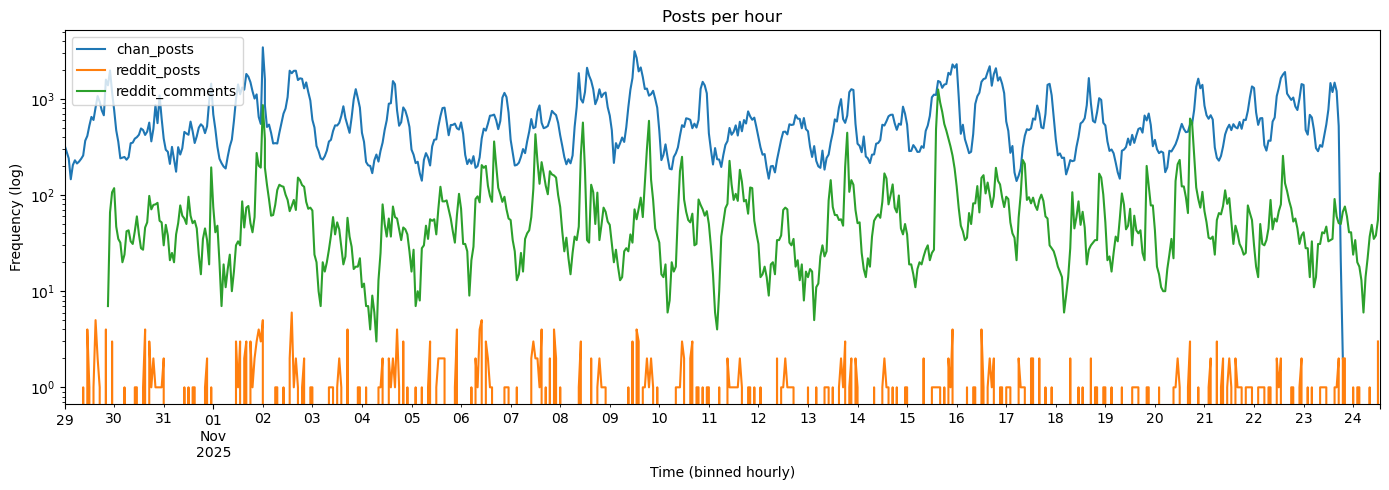

In [4]:
#plot line map
ax = per_hour.plot(figsize=(14,5))
ax.set_title("Posts per hour")
ax.set_yscale("log")
ax.set_xlabel("Time (binned hourly)")
ax.set_ylabel("Frequency (log)")
plt.tight_layout()
plt.show()

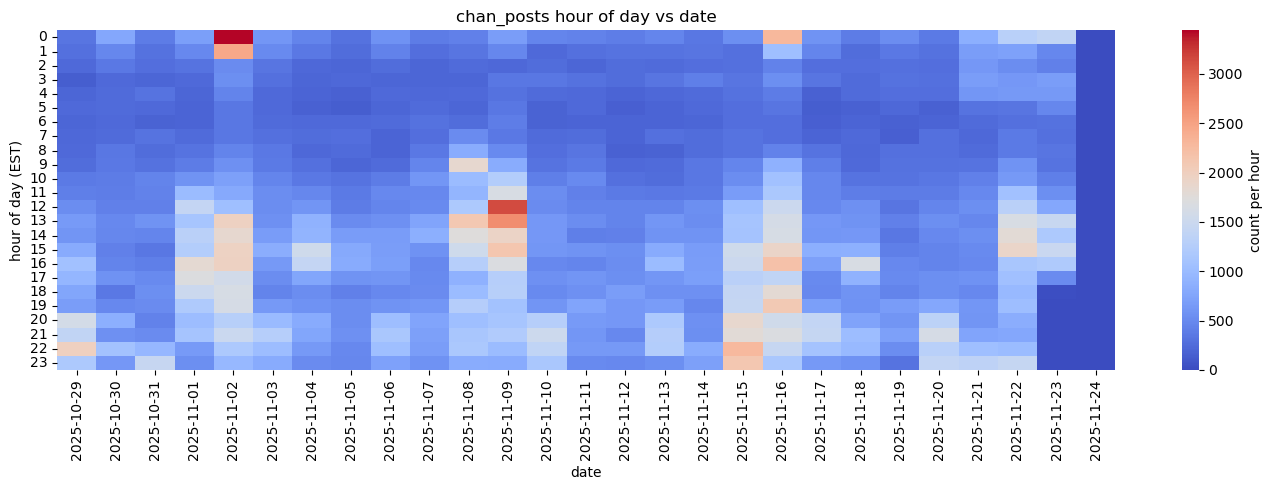

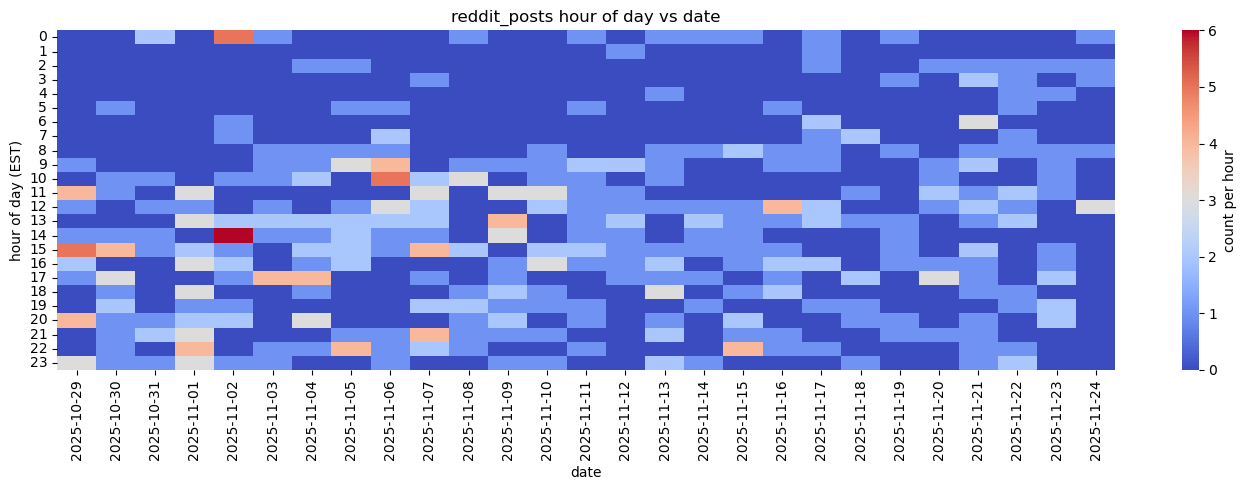

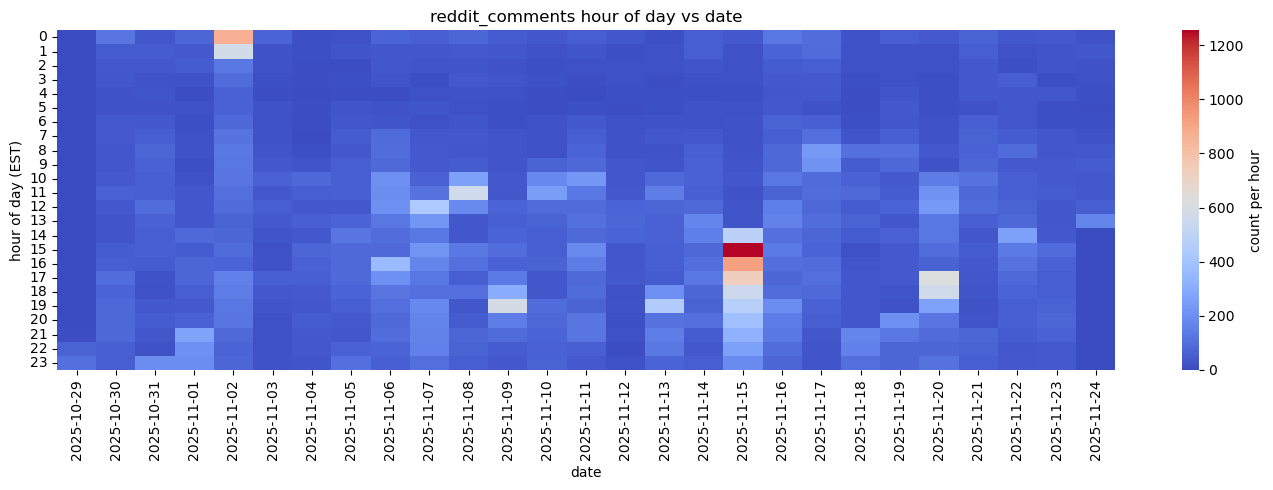

In [5]:
for column in per_hour.columns:
    g = per_hour[column].copy()
    g.index = pd.DatetimeIndex(g.index)
    heat = g.groupby([g.index.date, g.index.hour]).sum().unstack(fill_value=0).T  # 24 x days
    plt.figure(figsize=(14,5))
    sns.heatmap(heat, cmap="coolwarm", cbar_kws={"label": "count per hour"})
    plt.title(f"{column} hour of day vs date")
    plt.xlabel("date")
    plt.ylabel("hour of day (EST)")
    plt.tight_layout()
    plt.show()

,thread_number,post_number,text_body,toxicity,severe_toxicity,insult,profanity,threat,identity_attack,sexually_explicit
0,151620662,151677779,>Kramaric FFS,0.022139,0.003643,0.011921,0.033395,0.005816,0.001794,0.016396
1,151620662,151677801,TREECHAD,0.048347,0.004673,0.019999,0.060951,0.007780,0.004255,0.038217
2,151620662,151677816,based Bumman,0.181741,0.009689,0.061801,0.181105,0.008661,0.009693,0.198167
3,151620662,151677842,baumann got some weak ass wrists,0.788558,0.179267,0.486277,0.659612,0.014566,0.102216,0.796425
4,151620662,151677892,kwab,0.036870,0.002499,0.014277,0.025771,0.009463,0.008362,0.021468
...,...,...,...,...,...,...,...,...,...,...
248795,151949228,151949259,JDM about to get heemed unmeershartanately,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248796,151949228,151949263,DISGUSTING WONK SNOUT FREAK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248797,151949228,151949266,he knows what's coming. allah told him in a vi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248798,151949228,151949270,"Besides volk, who is the biggest booze hound o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


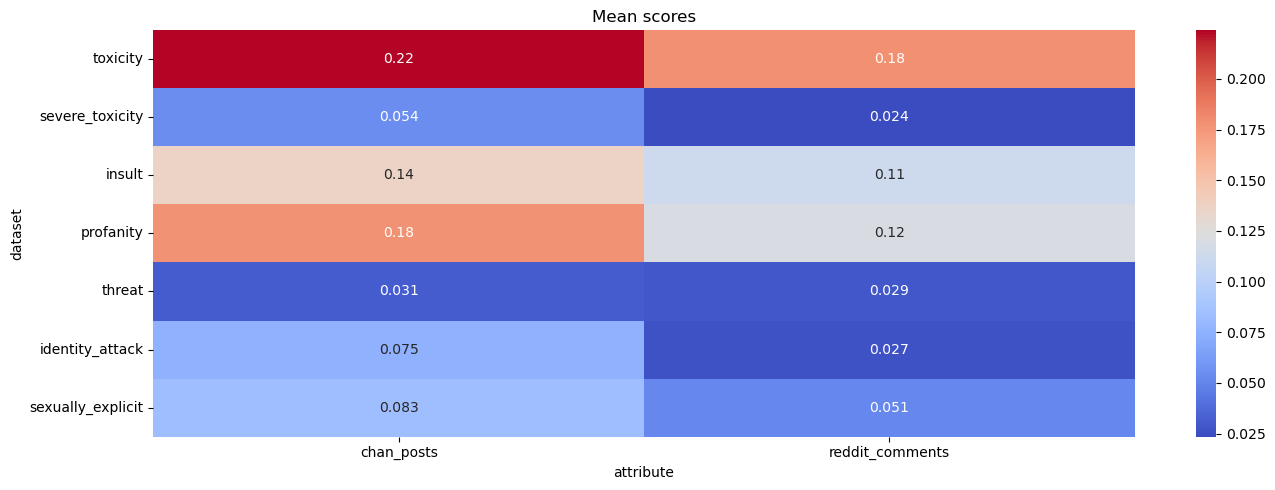

In [6]:
#persepctive api analysis
chan_posts_perspective = pd.read_csv("chan_posts_perspective.csv")
reddit_comments_perspective = pd.read_csv("reddit_comments_perspective.csv")

chan_posts_perspective.columns = ['thread_number','post_number','text_body','toxicity','severe_toxicity','insult','profanity','threat','identity_attack','sexually_explicit']
reddit_comments_perspective.columns = ['subreddit_id','text','toxicity','severe_toxicity','insult','profanity','threat','identity_attack','sexually_explicit']
attributes = ["toxicity","severe_toxicity","insult","profanity","threat","identity_attack","sexually_explicit"]

means = pd.DataFrame({"chan_posts": chan_posts_perspective[attributes].mean(),"reddit_comments": reddit_comments_perspective[attributes].mean()})
plt.figure(figsize=(14,5))
sns.heatmap(means, annot=True, cmap="coolwarm")
plt.title("Mean scores")
plt.xlabel("attribute")
plt.ylabel("dataset")
plt.tight_layout()




chan_posts_perspective

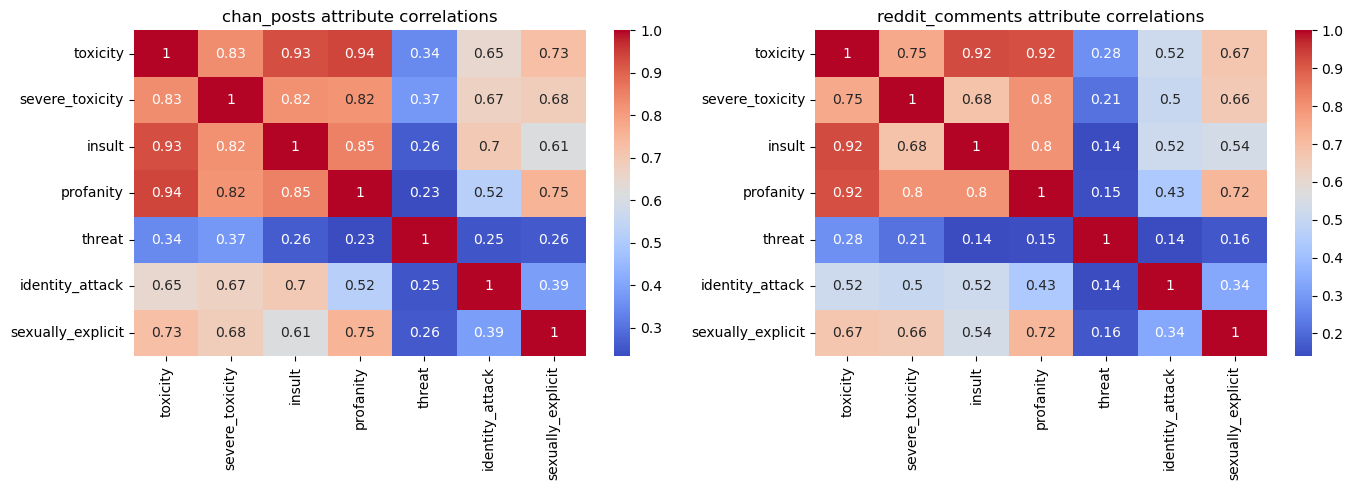

In [7]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(chan_posts_perspective[attributes].corr(), annot=True, cmap="coolwarm", ax=ax[0])
sns.heatmap(reddit_comments_perspective[attributes].corr(), annot=True, cmap="coolwarm", ax=ax[1])
ax[0].set_title("chan_posts attribute correlations")
ax[1].set_title("reddit_comments attribute correlations")
plt.tight_layout()

In [8]:
#lets compare annotations and model predictions
chan_posts_annotated = pd.read_csv("chan_posts_sample_final.csv")
chan_posts_annotated['sanjit_label'] = chan_posts_annotated['sanjit_label'].fillna('other').apply(lambda x: x.lower().strip())
chan_posts_annotated['mikail_label'] = chan_posts_annotated['mikail_label'].fillna('other').apply(lambda x: x.lower().strip())

chan_posts_annotated[chan_posts_annotated['sanjit_label'] != chan_posts_annotated['mikail_label']]

,Unnamed: 0.1,Unnamed: 0,board_name,thread_number,post_number,image_url,image_desc,title,text_body,sanjit_label,mikail_label,predicted_label,predicted_score,num_replies,created_utc,resto,data,score_map,entropy,scores
4,4,154065,sp,151848670,151848670,NaN,NaN,NaN,NaN,other,boxing,skeet shooting,0.462640,1,2025-11-08 3:48:09,0,"{""h"": 368, ""w"": 428, ""no"": 151848670, ""com"": ""...","{'boxing': 0.46263986825942993, 'target shooti...",3.562347,"{'skeet shooting': 0.0359138622879982, 'target..."
31,31,53724,sp,151736303,151736303,https://img.4plebs.org/boards/sp/image/1762/02...,The image features the logo of Penn State Univ...,NaN,>I HURT MYSELF TODAY TO SEE IF I STILL FEEL,american football,other,mma,0.116756,0,2025-11-01 19:33:20,0,"{""h"": 500, ""w"": 500, ""no"": 151736303, ""com"": ""...","{'mma': 0.11675643175840378, 'american footbal...",5.674130,"{'mma': 0.13882480561733246, 'american footbal..."


#### We can assume high agreement in human labelled annotations (98/100 rows match)

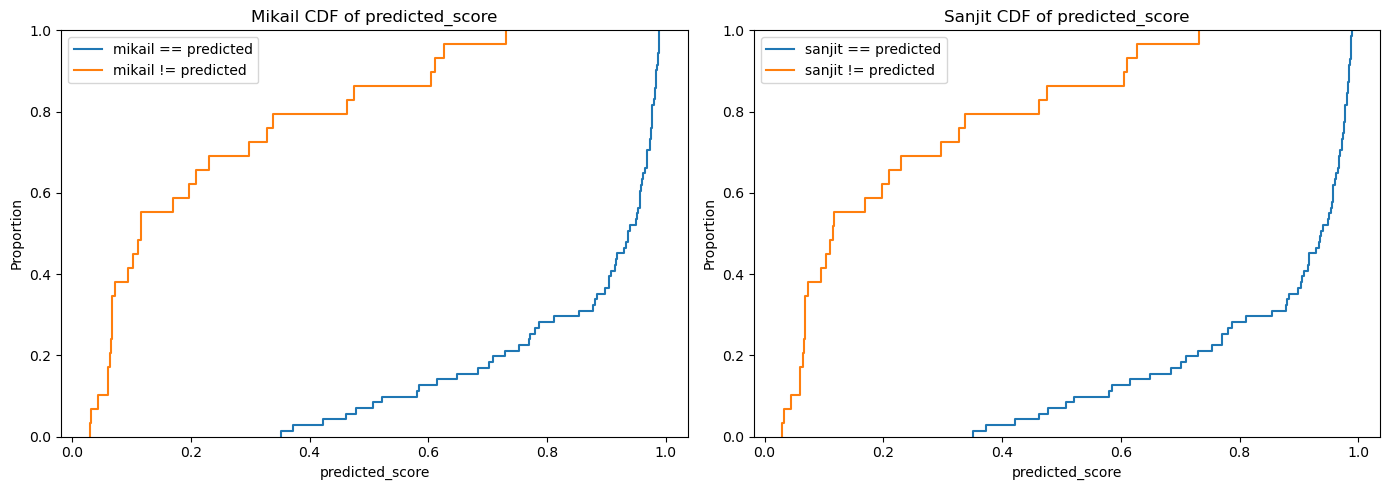

In [9]:
temp = chan_posts_annotated.copy()
temp['sanjit_label'] = temp['sanjit_label'].apply(lambda x: x if str(x) != "formula 1" else "car racing") #i noticed mismatch in annotated label vs label list that was made available to annotators
temp['mikail_label'] = temp['sanjit_label'].apply(lambda x: x if str(x) != "formula 1" else "car racing")
temp['match_mikail'] = temp["mikail_label"] == temp["predicted_label"]
temp['match_sanjit'] = temp["sanjit_label"] == temp["predicted_label"]

f, ax = plt.subplots(1,2, figsize=(14,5))
sns.ecdfplot(data=temp[temp["match_mikail"]], x="predicted_score", label="mikail == predicted", ax=ax[0])
sns.ecdfplot(data=temp[~temp["match_mikail"]], x="predicted_score", label="mikail != predicted", ax=ax[0])
sns.ecdfplot(data=temp[temp["match_sanjit"]], x="predicted_score", label="sanjit == predicted", ax=ax[1])
sns.ecdfplot(data=temp[~temp["match_sanjit"]], x="predicted_score", label="sanjit != predicted", ax=ax[1])
ax[0].set_title("Mikail CDF of predicted_score")
ax[0].legend()
ax[1].set_title("Sanjit CDF of predicted_score")
ax[1].legend()
plt.tight_layout()

#### A reasonable threshold for determining a sport using predicted_score can be 0.7, otherwise, we predicted "other"

In [10]:
#label all 4chan posts (drop 'other' since we cannot find a way to analyze them)
chan_posts_annotated_full = pd.read_csv("chan_posts_rest0_mistral_FULL_classified.csv")
chan_posts_annotated_full['predicted_label'] = chan_posts_annotated_full.apply(
    lambda row: 'other' if row['predicted_score'] < 0.7 else row['predicted_label'],
    axis=1
)
chan_posts_labelled = chan_posts.merge(
    chan_posts_annotated_full[['thread_number', 'predicted_label']],
    on='thread_number',
    how='left'
)
chan_posts_labelled.rename(columns={'predicted_label':'label'}, inplace=True)
print(f"Number of 'other' labels: {chan_posts_labelled[chan_posts_labelled['label'] == 'other'].shape}")
print(f"Number of non 'other' labels: {chan_posts_labelled[chan_posts_labelled['label'] != 'other'].shape}")
chan_posts_labelled = chan_posts_labelled[chan_posts_labelled['label'] != 'other']

Number of 'other' labels: (135261, 10)
Number of non 'other' labels: (275539, 10)


In [11]:
#label all reddit posts & commments
reddit_posts['flair'] = reddit_posts['flair'].apply(lambda x: str(x).split(':')[-1].lower().strip())
reddit_comments_labelled = reddit_comments.merge(
    reddit_posts,
    left_on='link_id',
    right_on='name',
    how='left',
    suffixes=('_comment', '_post')
)
reddit_comments_labelled.head()

,subreddit_id_comment,name_comment,text_comment,author_fullname_comment,link_id,parent_id,created_utc_comment,data_comment,Unnamed: 0,subreddit_id_post,name_post,title,text_post,flair,author_fullname_post,url,media,created_utc_post,data_post
0,t5_2qgzy,t1_nm4qvzn,‘Backcountry’ seems like a bit of an understat...,t2_16lfaf,t3_1ojdv8o,t3_1ojdv8o,2025-10-30 03:22:12,"{""id"": ""nm4qvzn"", ""ups"": 1, ""body"": ""‘Backcoun...",14.0,t5_2qgzy,t3_1ojdv8o,Travis Rice riding in the backcountry,NaN,snowboarding,t2_tyv2pon,https://v.redd.it/s6wjof6op3yf1,"{""reddit_video"": {""width"": 1080, ""height"": 192...",2025-10-29 19:20:23,"{""id"": ""1ojdv8o"", ""ups"": 797, ""url"": ""https://..."
1,t5_2qgzy,t1_nm4quhq,This is why watching the NBA is crap. Uphold t...,t2_dvg16b5i,t3_1oit4ht,t3_1oit4ht,2025-10-30 03:21:55,"{""id"": ""nm4quhq"", ""ups"": 1, ""body"": ""This is w...",22.0,t5_2qgzy,t3_1oit4ht,Giannis was not called for traveling on this d...,NaN,basketball,t2_dlkk5z8t,https://v.redd.it/8obiy0rgqyxf1,"{""reddit_video"": {""width"": 1080, ""height"": 108...",2025-10-29 02:35:42,"{""id"": ""1oit4ht"", ""ups"": 30839, ""url"": ""https:..."
2,t5_2qgzy,t1_nm4qsqb,Go Jays Go! Waited over 30 years for this series,t2_nrsdj,t3_1ojp541,t3_1ojp541,2025-10-30 03:21:35,"{""id"": ""nm4qsqb"", ""ups"": 1, ""body"": ""Go Jays G...",0.0,t5_2qgzy,t3_1ojp541,The Blue Jays won Game 5 of the 2025 World Ser...,NaN,baseball,t2_1g8s6jvv4a,https://v.redd.it/75dbksqb36yf1,"{""reddit_video"": {""width"": 1280, ""height"": 720...",2025-10-30 03:20:24,"{""id"": ""1ojp541"", ""ups"": 10, ""url"": ""https://v..."
3,t5_2qgzy,t1_nm4qrnn,Don't want a situation like Volpe's dad in the...,t2_98po9r600,t3_1ojm676,t1_nm474q5,2025-10-30 03:21:24,"{""id"": ""nm4qrnn"", ""ups"": 1, ""body"": ""Don't wan...",3.0,t5_2qgzy,t3_1ojm676,Davis Schneider’s dad posted a video of the le...,NaN,baseball,t2_1l7ikwf43l,https://v.redd.it/olftbzb2e5yf1,"{""reddit_video"": {""width"": 720, ""height"": 958,...",2025-10-30 00:59:01,"{""id"": ""1ojm676"", ""ups"": 1539, ""url"": ""https:/..."
4,t5_2qgzy,t1_nm4qkdx,Did he eventually come through on the monster ...,t2_12i3u4,t3_1ojed9c,t1_nm3f2gq,2025-10-30 03:20:04,"{""id"": ""nm4qkdx"", ""ups"": 1, ""body"": ""Did he ev...",13.0,t5_2qgzy,t3_1ojed9c,Giants RB Cam Skattebo had open tibia fracture...,NaN,football,t2_dlkk5z8t,https://www.espn.com/nfl/story/_/id/46771684/s...,NaN,2025-10-29 19:39:23,"{""id"": ""1ojed9c"", ""ups"": 1142, ""url"": ""https:/..."


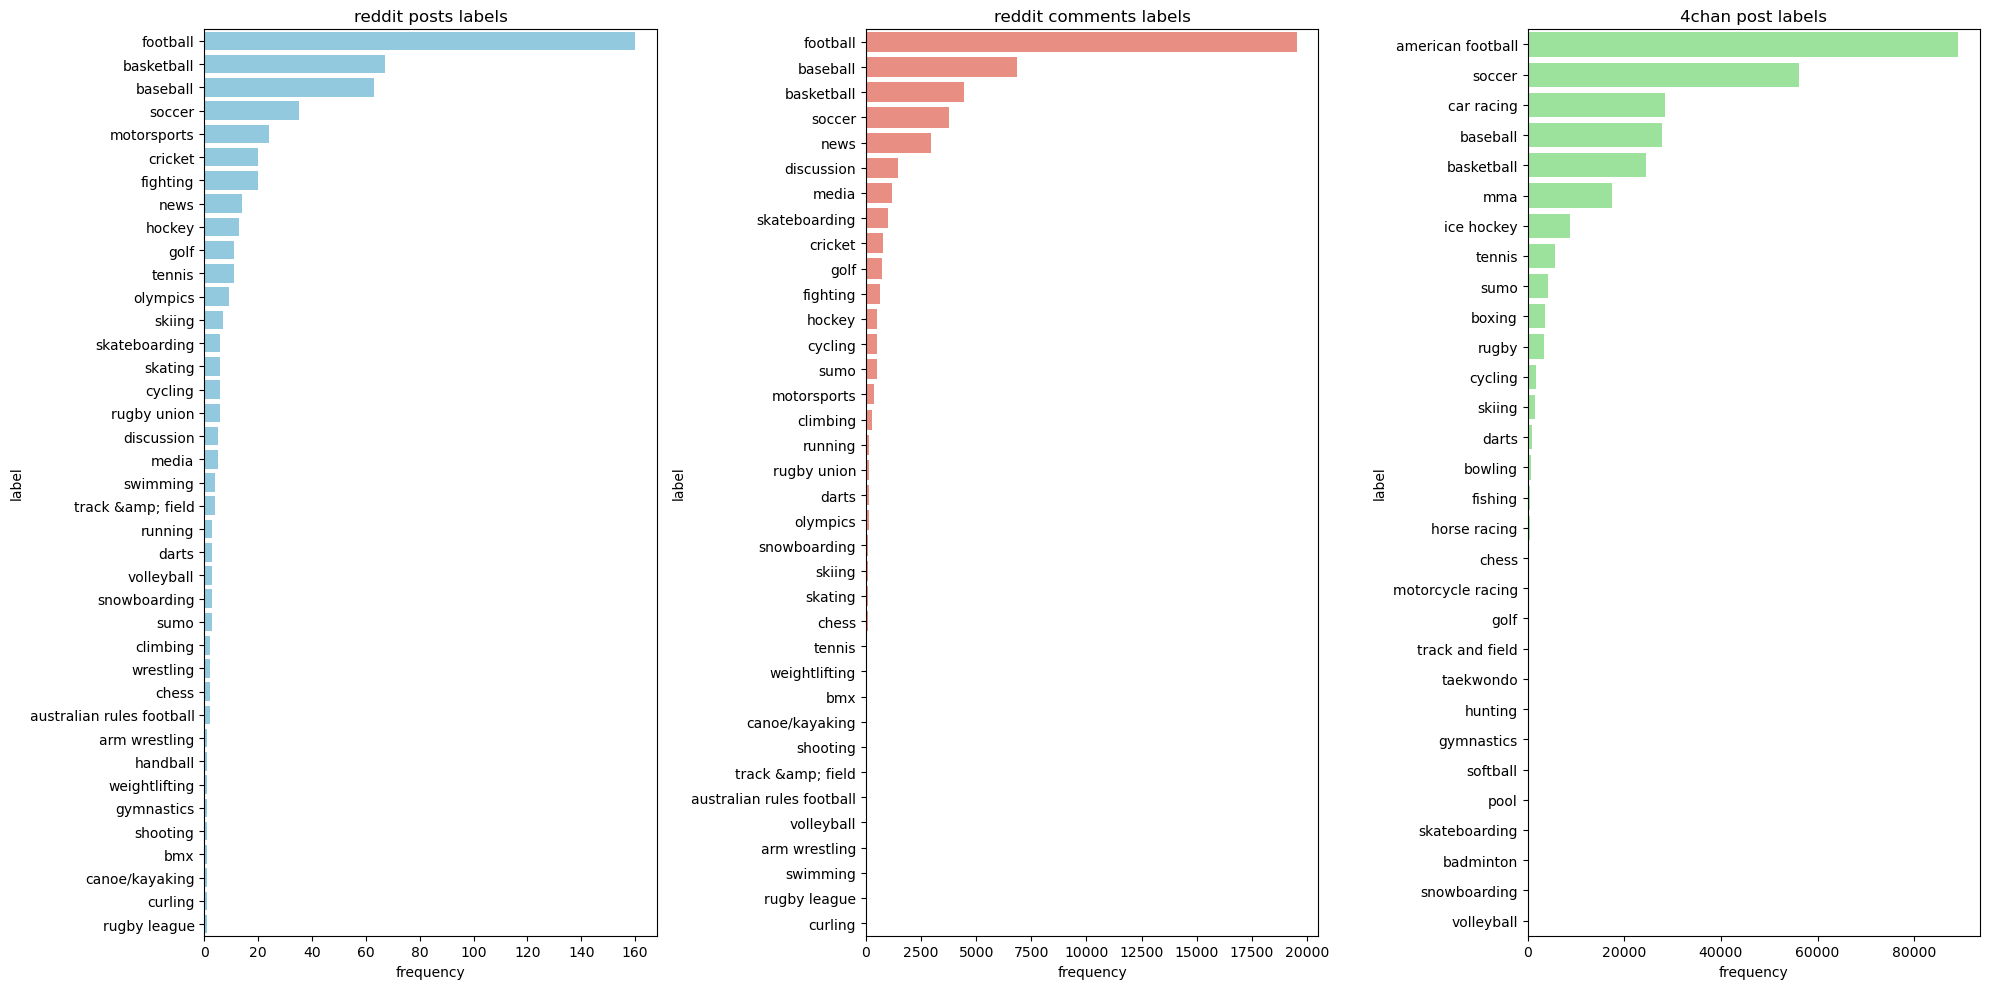

In [12]:
#plot all information
f, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.countplot(
    data=reddit_posts,
    y='flair',
    order=reddit_posts['flair'].value_counts().index,
    ax=ax[0],
    color='skyblue',
)
sns.countplot(
    data=reddit_comments_labelled,
    y='flair',
    order=reddit_comments_labelled['flair'].value_counts().index,
    ax=ax[1],
    color='salmon',
)
sns.countplot(
    data=chan_posts_labelled,
    y='label',
    order=chan_posts_labelled['label'].value_counts().index,
    ax=ax[2],
    color='lightgreen',
)
ax[0].set_title('reddit posts labels')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('label')
ax[1].set_title('reddit comments labels')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('label')
ax[2].set_title('4chan post labels')
ax[2].set_xlabel('frequency')
ax[2].set_ylabel('label')
plt.tight_layout()

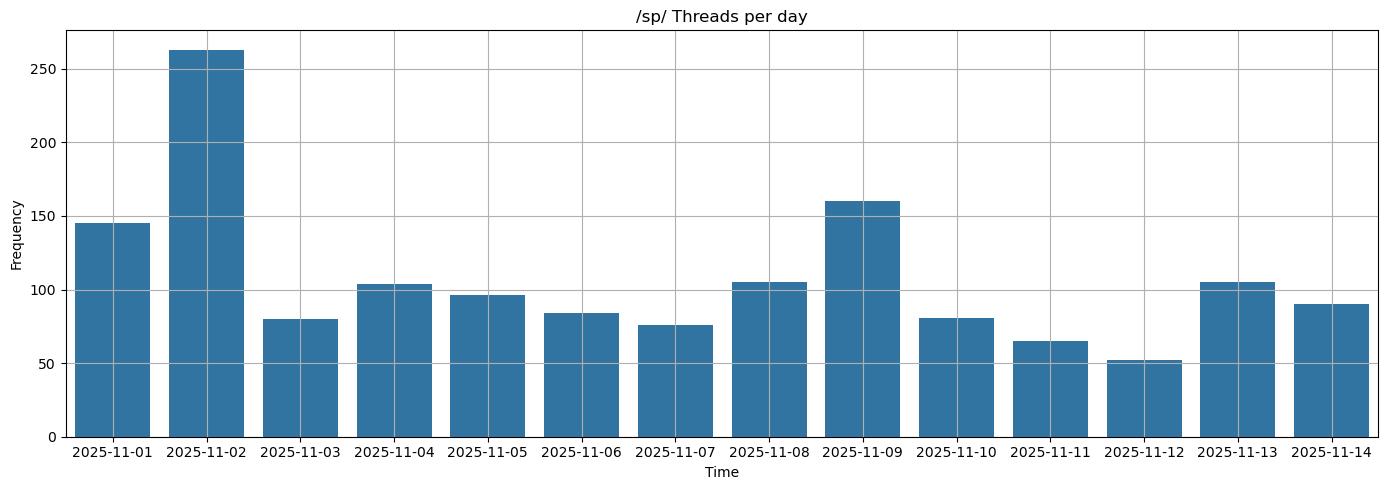

In [13]:
#chan threads created per day
chan_posts_rest0 = chan_posts[chan_posts['resto']==0]
chan_posts_rest0_per_hour = chan_posts_rest0.copy()

chan_posts_rest0_per_hour['created_utc'] = pd.to_datetime(chan_posts_rest0_per_hour['created_utc'], utc=True)
chan_posts_rest0_per_hour['created_est'] = chan_posts_rest0_per_hour['created_utc'].dt.tz_convert('America/New_York')
chan_posts_rest0_per_hour = chan_posts_rest0_per_hour.set_index('created_est')
chan_posts_rest0_per_hour = chan_posts_rest0_per_hour.resample('D').size()

per_day = pd.concat([chan_posts_rest0_per_hour], axis=1)
per_day.columns = ["threads"]
per_day = per_day.loc["2025-11-01":"2025-11-14"]

plt.figure(figsize=(14, 5))
ax = sns.barplot(x=per_day.index.date, y=per_day['threads'])
ax.set_title("/sp/ Threads per day")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency")
plt.grid(True)
plt.tight_layout()

/var/folders/rl/0s8xskjx5c5c44ktz6tlp9dr0000gn/T/ipykernel_47234/967219046.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chan_posts_rest0_per_hour = chan_posts_rest0_per_hour.resample('H').size()


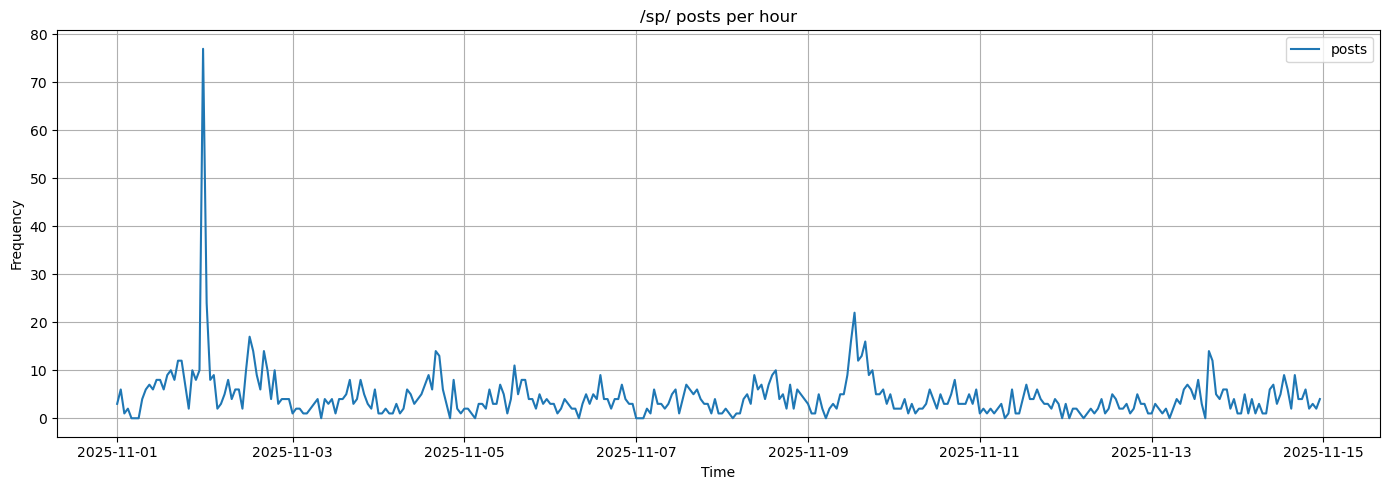

In [14]:
#chan posts per hour
chan_posts_rest0 = chan_posts[chan_posts['resto']==0]
chan_posts_rest0_per_hour = chan_posts_rest0.copy()

chan_posts_rest0_per_hour['created_utc'] = pd.to_datetime(chan_posts_rest0_per_hour['created_utc'], utc=True)
chan_posts_rest0_per_hour['created_est'] = chan_posts_rest0_per_hour['created_utc'].dt.tz_convert('America/New_York')
chan_posts_rest0_per_hour = chan_posts_rest0_per_hour.set_index('created_est')
chan_posts_rest0_per_hour = chan_posts_rest0_per_hour.resample('H').size()

per_hour = pd.concat([chan_posts_rest0_per_hour], axis=1)
per_hour.columns = ["posts"]
per_hour = per_hour.loc["2025-11-01":"2025-11-14"]

plt.figure(figsize=(14, 5))
ax = sns.lineplot(data=per_hour)
ax.set_title("/sp/ posts per hour")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency")
plt.grid(True)
plt.tight_layout()

In [15]:
chan_posts_labelled

,board_name,thread_number,post_number,title,text_body,num_replies,created_utc,resto,data,label
5,sp,151674475,151676628,NaN,"<a href=""#p151676605"" class=""quotelink"">&gt;&g...",NaN,2025-10-28 21:00:29,151674475,"{""no"": 151676628, ""com"": ""<a href=\""#p15167660...",soccer
6,sp,151674475,151676635,NaN,"<a href=""#p151676605"" class=""quotelink"">&gt;&g...",NaN,2025-10-28 21:00:54,151674475,"{""h"": 720, ""w"": 1280, ""no"": 151676635, ""com"": ...",soccer
7,sp,151674475,151676653,NaN,"<a href=""#p151676537"" class=""quotelink"">&gt;&g...",NaN,2025-10-28 21:01:59,151674475,"{""h"": 650, ""w"": 1200, ""no"": 151676653, ""com"": ...",soccer
8,sp,151674475,151676657,NaN,"<a href=""#p151676609"" class=""quotelink"">&gt;&g...",NaN,2025-10-28 21:02:21,151674475,"{""h"": 532, ""w"": 300, ""no"": 151676657, ""com"": ""...",soccer
9,sp,151674475,151676660,NaN,Where is the boliviano to explain this?,NaN,2025-10-28 21:02:26,151674475,"{""h"": 1350, ""w"": 1080, ""no"": 151676660, ""com"":...",soccer
...,...,...,...,...,...,...,...,...,...,...
410788,sp,152107846,152120751,NaN,"<a href=""#p152120627"" class=""quotelink"">&gt;&g...",NaN,2025-11-23 23:00:23,152107846,"{""no"": 152120751, ""com"": ""<a href=\""#p15212062...",darts
410789,sp,152107846,152120807,NaN,"<a href=""#p152120627"" class=""quotelink"">&gt;&g...",NaN,2025-11-23 23:03:39,152107846,"{""no"": 152120807, ""com"": ""<a href=\""#p15212062...",darts
410790,sp,152120762,152120762,EAGLES @ COWBOYS GAME THREAD 2: ELECTRIC BOOGALOO,AJ got the ball<br>Dook poopscoop<br>refs reff...,1.0,2025-11-23 23:01:11,0,"{""h"": 236, ""w"": 420, ""no"": 152120762, ""com"": ""...",american football
410791,sp,152120762,152120813,NaN,Anime,NaN,2025-11-23 23:03:46,152120762,"{""no"": 152120813, ""com"": ""Anime"", ""now"": ""11/2...",american football


In [16]:
import re, html
import numpy as np

_TAGS  = re.compile(r"<[^>]+>")
_BR    = re.compile(r"<br\s*/?>", flags=re.I)
_WS    = re.compile(r"\s+")
_URL   = re.compile(r"https?://\S+|www\.\S+")
_REPLY = re.compile(r">>\d+")

def clean_chan_cell(x, drop_urls=True, drop_reply_refs=True):
    """Clean one cell of 4chan-ish text (HTML/entities/refs). Safe for df.apply."""
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return ""
    s = html.unescape(str(x))
    s = _BR.sub("\n", s)
    if drop_urls:
        s = _URL.sub(" ", s)
    if drop_reply_refs:
        s = _REPLY.sub(" ", s)
    s = _TAGS.sub(" ", s)
    s = _WS.sub(" ", s).strip()
    return s

# modify in place:
chan_posts_labelled[["title", "text_body"]] = chan_posts_labelled[["title", "text_body"]].applymap(clean_chan_cell)
chan_posts_labelled

/var/folders/rl/0s8xskjx5c5c44ktz6tlp9dr0000gn/T/ipykernel_47234/1840570531.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chan_posts_labelled[["title", "text_body"]] = chan_posts_labelled[["title", "text_body"]].applymap(clean_chan_cell)


,board_name,thread_number,post_number,title,text_body,num_replies,created_utc,resto,data,label
5,sp,151674475,151676628,,"you don't get it, bro, this stuff is not like ...",NaN,2025-10-28 21:00:29,151674475,"{""no"": 151676628, ""com"": ""<a href=\""#p15167660...",soccer
6,sp,151674475,151676635,,"It's Seara, so it's not the real thing, but th...",NaN,2025-10-28 21:00:54,151674475,"{""h"": 720, ""w"": 1280, ""no"": 151676635, ""com"": ...",soccer
7,sp,151674475,151676653,,I would destroy all of these except for that c...,NaN,2025-10-28 21:01:59,151674475,"{""h"": 650, ""w"": 1200, ""no"": 151676653, ""com"": ...",soccer
8,sp,151674475,151676657,,Oficial sponsor,NaN,2025-10-28 21:02:21,151674475,"{""h"": 532, ""w"": 300, ""no"": 151676657, ""com"": ""...",soccer
9,sp,151674475,151676660,,Where is the boliviano to explain this?,NaN,2025-10-28 21:02:26,151674475,"{""h"": 1350, ""w"": 1080, ""no"": 151676660, ""com"":...",soccer
...,...,...,...,...,...,...,...,...,...,...
410788,sp,152107846,152120751,,>but there's also the comedy of the WDF Worlds...,NaN,2025-11-23 23:00:23,152107846,"{""no"": 152120751, ""com"": ""<a href=\""#p15212062...",darts
410789,sp,152107846,152120807,,TYBOP!,NaN,2025-11-23 23:03:39,152107846,"{""no"": 152120807, ""com"": ""<a href=\""#p15212062...",darts
410790,sp,152120762,152120762,EAGLES @ COWBOYS GAME THREAD 2: ELECTRIC BOOGALOO,AJ got the ball Dook poopscoop refs reffing co...,1.0,2025-11-23 23:01:11,0,"{""h"": 236, ""w"": 420, ""no"": 152120762, ""com"": ""...",american football
410791,sp,152120762,152120813,,Anime,NaN,2025-11-23 23:03:46,152120762,"{""no"": 152120813, ""com"": ""Anime"", ""now"": ""11/2...",american football


In [17]:
reddit_comments

,subreddit_id,name,text,author_fullname,link_id,parent_id,created_utc,data
0,t5_2qgzy,t1_nm4qvzn,‘Backcountry’ seems like a bit of an understat...,t2_16lfaf,t3_1ojdv8o,t3_1ojdv8o,2025-10-30 03:22:12,"{""id"": ""nm4qvzn"", ""ups"": 1, ""body"": ""‘Backcoun..."
1,t5_2qgzy,t1_nm4quhq,This is why watching the NBA is crap. Uphold t...,t2_dvg16b5i,t3_1oit4ht,t3_1oit4ht,2025-10-30 03:21:55,"{""id"": ""nm4quhq"", ""ups"": 1, ""body"": ""This is w..."
2,t5_2qgzy,t1_nm4qsqb,Go Jays Go! Waited over 30 years for this series,t2_nrsdj,t3_1ojp541,t3_1ojp541,2025-10-30 03:21:35,"{""id"": ""nm4qsqb"", ""ups"": 1, ""body"": ""Go Jays G..."
3,t5_2qgzy,t1_nm4qrnn,Don't want a situation like Volpe's dad in the...,t2_98po9r600,t3_1ojm676,t1_nm474q5,2025-10-30 03:21:24,"{""id"": ""nm4qrnn"", ""ups"": 1, ""body"": ""Don't wan..."
4,t5_2qgzy,t1_nm4qkdx,Did he eventually come through on the monster ...,t2_12i3u4,t3_1ojed9c,t1_nm3f2gq,2025-10-30 03:20:04,"{""id"": ""nm4qkdx"", ""ups"": 1, ""body"": ""Did he ev..."
...,...,...,...,...,...,...,...,...
47026,t5_2qgzy,t1_nqkm62a,Sure. 99.9% of the time I bet they’re fine. Bu...,t2_eab6e3v7,t3_1p5nt8d,t1_nqkk321,2025-11-24 18:42:04,"{""id"": ""nqkm62a"", ""ups"": 2, ""body"": ""Sure. 99...."
47027,t5_2qgzy,t1_nqkm0n9,My knees are exploding watching this,t2_a71t75es,t3_1p5nt8d,t3_1p5nt8d,2025-11-24 18:41:21,"{""id"": ""nqkm0n9"", ""ups"": 1, ""body"": ""My knees ..."
47028,t5_2qgzy,t1_nqklzn3,Too cool for a helmet,t2_1mrcnm7sln,t3_1p5nt8d,t1_nqkc15p,2025-11-24 18:41:13,"{""id"": ""nqklzn3"", ""ups"": 0, ""body"": ""Too cool ..."
47029,t5_2qgzy,t1_nqklw29,*Cries in 36yo*,t2_7jvx9,t3_1p5nt8d,t1_nqkc15p,2025-11-24 18:40:45,"{""id"": ""nqklw29"", ""ups"": 0, ""body"": ""*Cries in..."


In [18]:
"""
temp = (
    reddit_comments_labelled
    .rename(
        columns={
            "subreddit_id_comment": "subreddit_id",
            "name_comments": "name",
            "text_comment": "text",
            "author_fullname_comment": "author_fullname",
            "created_utc_comment": "created_utc",
            "data_comment": "data",
        }
    )
    .drop(
        columns=[
            "Unnamed: 0",
            "subreddit_id_post",
            "name_post",
            "title",
            "text_post",
            "author_fullname_post",
            "url",
            "media",
            "created_utc_post",
            "data_post",
        ]
    )
)
temp.to_csv("reddit_comments_labelled.csv")
"""

'\ntemp = (\n    reddit_comments_labelled\n    .rename(\n        columns={\n            "subreddit_id_comment": "subreddit_id",\n            "name_comments": "name",\n            "text_comment": "text",\n            "author_fullname_comment": "author_fullname",\n            "created_utc_comment": "created_utc",\n            "data_comment": "data",\n        }\n    )\n    .drop(\n        columns=[\n            "Unnamed: 0",\n            "subreddit_id_post",\n            "name_post",\n            "title",\n            "text_post",\n            "author_fullname_post",\n            "url",\n            "media",\n            "created_utc_post",\n            "data_post",\n        ]\n    )\n)\ntemp.to_csv("reddit_comments_labelled.csv")\n'

In [19]:
import pandas as pd

freq = "1h"   # "5min", "30min", "1H", ...

df = pd.read_csv("reddit_posts_labelled.csv")

# 1) Parse as UTC (timestamps like "2025-10-30 03:20:24" that are in UTC)
df["created_dt"] = pd.to_datetime(df["created_utc"], utc=True, errors="coerce")

# 2) Convert to US Eastern (handles DST)
df["created_dt"] = df["created_dt"].dt.tz_convert("America/New_York")

# 3) Floor in Eastern time to 1-hour bins
df["time_bin"] = df["created_dt"].dt.floor(freq)

# 4) Group by flair × time_bin
agg = (
    df.groupby(["flair", "time_bin"])
      .size()
      .rename("count")
      .reset_index()
)
# 5) Build full 1-hour index across entire range (Eastern)
idx_full = pd.date_range(
    start=agg["time_bin"].min(),
    end=agg["time_bin"].max(),
    freq=freq,
    tz="America/New_York",
)
# 6) Pivot → flair × hour matrix, fill gaps with 0
pivot = (
    agg.pivot(index="flair", columns="time_bin", values="count")
       .reindex(columns=idx_full)
       .fillna(0)
)
len(pivot.columns)  # sanity check

774

In [20]:
reddit_posts['flair'].unique()

array(['baseball', 'rugby union', 'football', 'basketball', 'motorsports',
       'olympics', 'snowboarding', 'hockey', 'cricket', 'skiing', 'news',
       'skating', 'volleyball', 'chess', 'soccer', 'wrestling', 'media',
       'swimming', 'fighting', 'gymnastics', 'climbing',
       'track &amp; field', 'running', 'tennis', 'discussion', 'golf',
       'curling', 'canoe/kayaking', 'bmx', 'skateboarding', 'cycling',
       'australian rules football', 'shooting', 'darts', 'sumo',
       'weightlifting', 'handball', 'arm wrestling', 'rugby league'],
      dtype=object)

[OK] reddit_posts_labelled.csv: 528 -> 269 rows  |  saved: reddit_posts_labelled_filtered_2025-10-31_to_2025-11-14.csv
[OK] reddit_comments_labelled.csv: 47031 -> 25599 rows  |  saved: reddit_comments_labelled_filtered_2025-10-31_to_2025-11-14.csv
[OK] chan_posts_labelled.csv: 275539 -> 153102 rows  |  saved: chan_posts_labelled_filtered_2025-10-31_to_2025-11-14.csv
[ERROR] reddit_posts_perspective.csv: reddit_posts_perspective.csv: missing 'created_utc'. Columns: ['name', 'title', 'text', 'TOXICITY', 'SEVERE_TOXICITY', 'INSULT', 'PROFANITY', 'THREAT', 'IDENTITY_ATTACK', 'SEXUALLY_EXPLICIT']
[ERROR] reddit_comments_perspective.csv: reddit_comments_perspective.csv: missing 'created_utc'. Columns: ['name', 'text', 'TOXICITY', 'SEVERE_TOXICITY', 'INSULT', 'PROFANITY', 'THREAT', 'IDENTITY_ATTACK', 'SEXUALLY_EXPLICIT']
[ERROR] chan_posts_perspective.csv: chan_posts_perspective.csv: missing 'created_utc'. Columns: ['thread_id', 'post_id', 'text', 'TOXICITY', 'SEVERE_TOXICITY', 'INSULT', 'PRO